In [34]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import os
import re
import matplotlib.pyplot as plt

In [35]:
sales_df = pd.read_csv("sales.csv")
sales_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# Add a Month column

### clean data


In [36]:
sales_df = sales_df.dropna(how="all")
sales_df =  sales_df[sales_df["Order ID"] != "Order ID"]
sales_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [37]:
sales_df["Month"] = sales_df["Order Date"].str[:2]
sales_df["Month"] = sales_df.Month.astype("Int32")
sales_df["Quantity Ordered"] = sales_df["Quantity Ordered"].astype("Int64")
sales_df["Price Each"] = sales_df["Price Each"].astype("Float64")

In [38]:
sales_df["Price Each"]

0          11.95
2          99.99
3          600.0
4          11.99
5          11.99
           ...  
186845      2.99
186846     700.0
186847     700.0
186848    379.99
186849     11.95
Name: Price Each, Length: 185950, dtype: Float64

# find out sum of sales grouped byy month

In [39]:
sales_df = sales_df.sort_values(by="Month")
sales_df["Sale"] = sales_df["Quantity Ordered"] * sales_df["Price Each"]

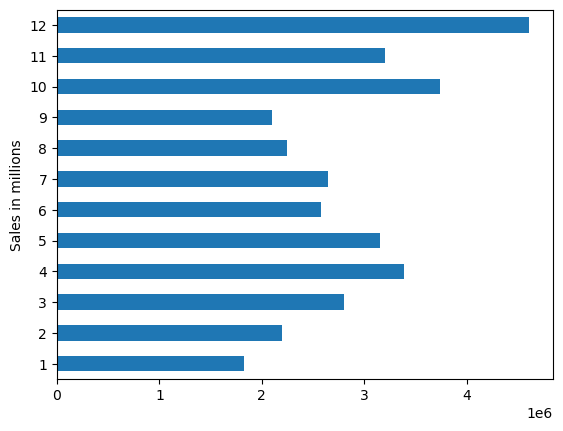

In [40]:
sales_by_month = sales_df.groupby(["Month"])["Sale"].sum()
# print(total_monthly_sales)
monthly_chart = sales_by_month.plot(kind="barh",ylabel="Sales in millions")

# find the city which gives most sales


In [41]:
sales_df["City"] = sales_df["Purchase Address"].str.split(",").map(lambda x: x[1])

In [42]:
sales_by_city = sales_df.groupby("City")["Sale"].sum()

<Axes: ylabel='City'>

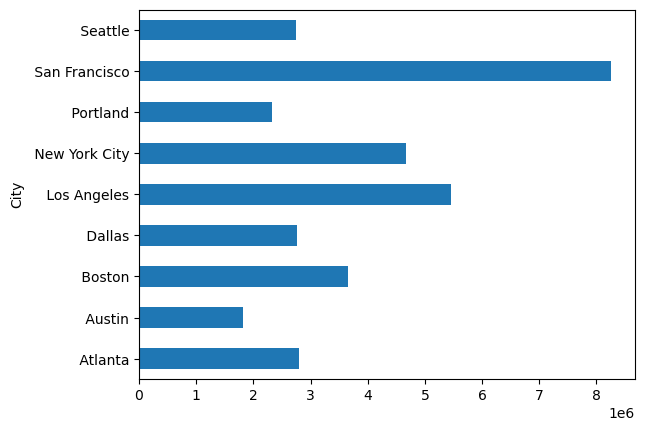

In [43]:
sales_by_city.plot.barh(sales_by_city)

# now give me the sales according to distributed by the 24 hours in a day

In [44]:
sales_df["Order Date"]=pd.to_datetime(sales_df["Order Date"])

C:\Users\wasif\AppData\Local\Temp\ipykernel_7504\4174331768.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_df["Order Date"]=pd.to_datetime(sales_df["Order Date"])


sales_df.head()

In [45]:
sales_df["Hour"]=sales_df["Order Date"].dt.hour

<Axes: xlabel='Sales in USD (Million)', ylabel='Hour'>

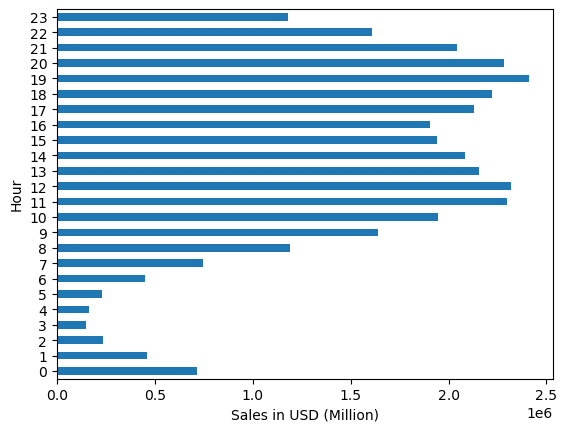

In [46]:
sales_by_hour = sales_df.groupby("Hour")["Sale"].sum()
sales_by_hour.plot(kind='barh', xlabel="Sales in USD (Million)")
# sales_by_hour

# give me the products which are the most to be sold together

In [47]:
multiple_products_df = sales_df[sales_df.duplicated(subset="Order ID", keep=False)]

In [48]:
multiple_products_df["Grouped"] = multiple_products_df.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))
# multiple_products_df.head()

C:\Users\wasif\AppData\Local\Temp\ipykernel_7504\3707227119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_products_df["Grouped"] = multiple_products_df.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))


In [49]:
multiple_products_df = multiple_products_df[["Grouped", "Order ID"]].drop_duplicates()

In [50]:
def sort_group(x):
    cats = x.split(", ")
    cats.sort()
    return ", ".join(cats)
ordercount_by_combination = multiple_products_df["Grouped"].map(sort_group).value_counts()

Gets the most popular products that are bought together


<Axes: ylabel='Grouped'>

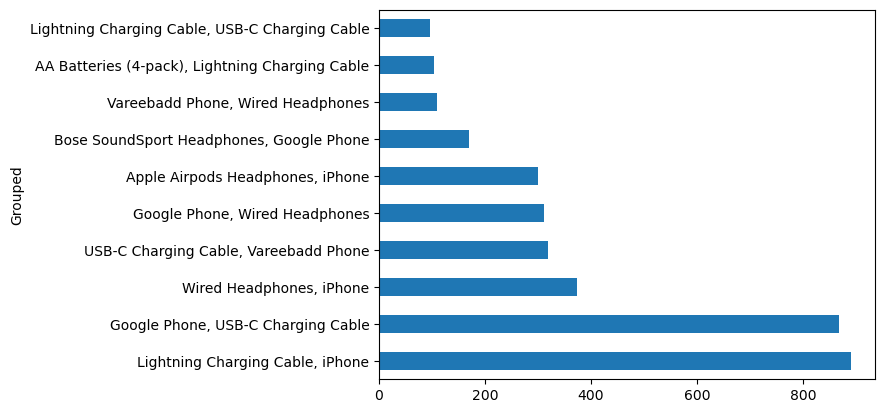

In [51]:
ordercount_by_combination.iloc[:10].plot.barh()

# now find which product has been sold the most (we can do this by seeing the 'Quantity ORdered column')

In [52]:
sales_by_product = sales_df.groupby("Product")["Quantity Ordered"].sum().sort_values()

<Axes: xlabel='Quantity', ylabel='Product'>

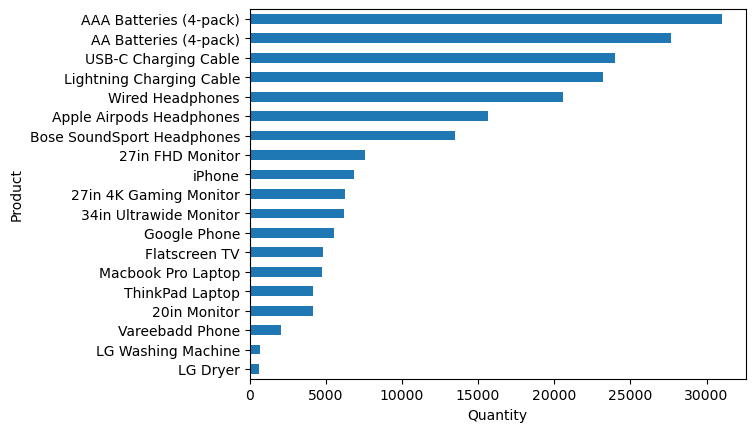

In [53]:
sales_by_product.plot.barh(xlabel="Quantity")

### Is this pattern related somehow to the price of each product? Lets find out

In [61]:
products_df = DataFrame(sales_df.groupby("Product")["Price Each"].mean())
products_df["Quantity Ordered"] = sales_by_product
# products_df.head()
# (unit_price).plot()

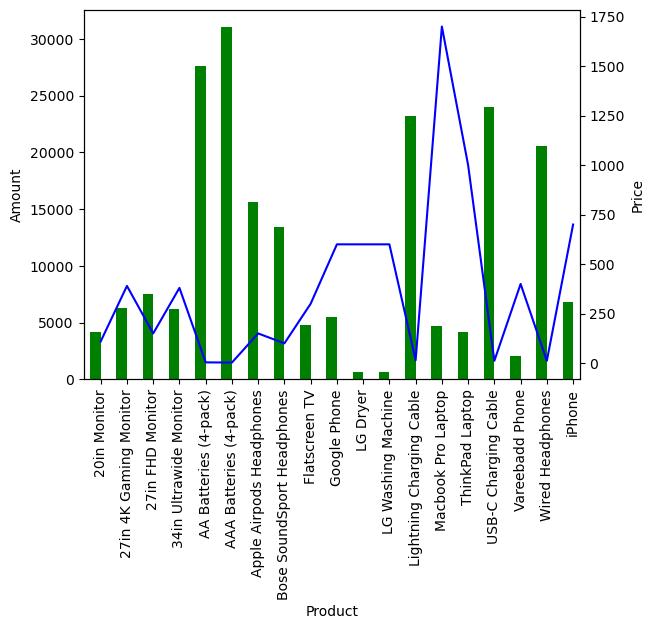

In [62]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

products_df["Quantity Ordered"].plot(kind='bar', color='green', ax=ax, width=width, position=1)
products_df["Price Each"].plot(kind="line", color='blue', ax=ax2,)

ax.set_ylabel('Amount')
ax2.set_ylabel('Price')

plt.show()